**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/underfitting-and-overfitting).**

---


## Recap
You've built your first model, and now it's time to optimize the size of the tree to make better predictions. Run this cell to set up your coding environment where the previous step left off.

In [1]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex5 import *
print("\nSetup complete")

Validation MAE: 29,653

Setup complete


# Exercises
You could write the function `get_mae` yourself. For now, we'll supply it. This is the same function you read about in the previous lesson. Just run the cell below.

In [2]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## Step 1: Compare Different Tree Sizes
Write a loop that tries the following values for *max_leaf_nodes* from a set of possible values.

Call the *get_mae* function on each value of max_leaf_nodes. Store the output in some way that allows you to select the value of `max_leaf_nodes` that gives the most accurate model on your data.

In [7]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
mae_values = [] #Creo una seria donde almacenar los valores de MAE obtenidos
for max_leaf_nodes in candidate_max_leaf_nodes:
    mae = get_mae(max_leaf_nodes,train_X, val_X, train_y, val_y) #Calculo MAE
    mae_values.append(mae) #Incorporo los valores de MAE a la lista

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
indice = mae_values.index(min(mae_values)) #Selecciono el indice de la lista correspondiente al menor valor de MAE
best_tree_size = candidate_max_leaf_nodes[indice] #Obtengo el numero de hojas con el indice anterior

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [11]:
#Observo cual es el valor de "leaf_nodes" que genera menor MAE

best_tree_size

100

Text(0, 0.5, 'MAE')

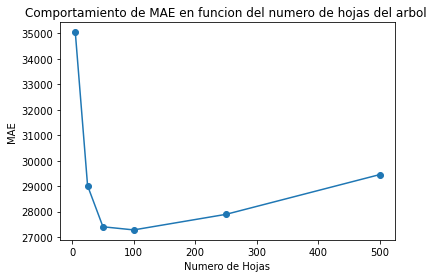

In [18]:
#Tambien podemos ver los valores en forma grafica para confirmar que el minimo valor se obtiene con leaf_nodes=100

import matplotlib.pyplot as plt

plt.plot(candidate_max_leaf_nodes,mae_values,marker="o")
plt.title("Comportamiento de MAE en funcion del numero de hojas del arbol ")
plt.xlabel("Numero de Hojas")
plt.ylabel("MAE")

In [8]:
# The lines below will show you a hint or the solution.
step_1.hint() 
step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> You will call get_mae in the loop. You'll need to map the names of your data structure to the names in get_mae

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Here is a short solution with a dict comprehension.
# The lesson gives an example of how to do this with an explicit loop.
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)

```

### Analisis mas detallado de la cantidad de hojas del arbol

In [24]:
import numpy as np

In [28]:
candidate_max_leaf_nodes_new = np.arange(2,1001)
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
mae_values_new = [] #Creo una seria donde almacenar los valores de MAE obtenidos
for max_leaf_nodes in candidate_max_leaf_nodes_new:
    mae = get_mae(max_leaf_nodes,train_X, val_X, train_y, val_y) #Calculo MAE
    mae_values_new.append(mae) #Incorporo los valores de MAE a la lista

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
indice_new = mae_values_new.index(min(mae_values_new)) #Selecciono el indice de la lista correspondiente al menor valor de MAE
best_tree_size_new = candidate_max_leaf_nodes_new[indice_new] #Obtengo el numero de hojas con el indice anterior
best_tree_size_new

71

Text(0, 0.5, 'MAE')

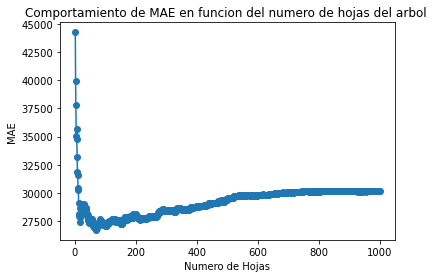

In [29]:
plt.plot(candidate_max_leaf_nodes_new,mae_values_new)
plt.title("Comportamiento de MAE en funcion del numero de hojas del arbol ")
plt.xlabel("Numero de Hojas")
plt.ylabel("MAE")

## Step 2: Fit Model Using All Data
You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size.  That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [21]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size,random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(X,y)

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [22]:
step_2.hint()
step_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Fit with the ideal value of max_leaf_nodes. In the fit step, use all of the data in the dataset

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Fit the model with best_tree_size. Fill in argument to make optimal size
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model
final_model.fit(X, y)
```

You've tuned this model and improved your results. But we are still using Decision Tree models, which are not very sophisticated by modern machine learning standards. In the next step you will learn to use Random Forests to improve your models even more.

# Keep Going

You are ready for **[Random Forests](https://www.kaggle.com/dansbecker/random-forests).**


---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161285) to chat with other Learners.*